In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

In [2]:
pt1 = np.array([[37, 51], [342, 42], [485, 467], [73, 380]])
pt2 = np.array([[0, 0], [511, 0], [511, 511], [0, 511]])


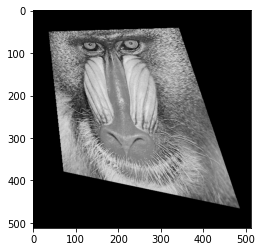

In [3]:
img = cv.imread('./images/baboon_perspectiva.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')


In [4]:
def get_perspective_transform(pointsA, pointsB):
    if pointsA.shape != (4, 2) or pointsB.shape != (4, 2):
        raise ValueError("There must be four points")

    a = np.zeros((8, 8))
    b = np.zeros((8))
    for i in range(4):
        a[i][0] = a[i+4][3] = pointsA[i][0]
        a[i][1] = a[i+4][4] = pointsA[i][1]
        a[i][2] = a[i+4][5] = 1
        a[i][3] = a[i][4] = a[i][5] = 0
        a[i+4][0] = a[i+4][1] = a[i+4][2] = 0
        a[i][6] = -pointsA[i][0]*pointsB[i][0]
        a[i][7] = -pointsA[i][1]*pointsB[i][0]
        a[i+4][6] = -pointsA[i][0]*pointsB[i][1]
        a[i+4][7] = -pointsA[i][1]*pointsB[i][1]
        b[i] = pointsB[i][0]
        b[i+4] = pointsB[i][1]

    x = np.linalg.solve(a, b)
    x.resize((9,))
    x[8] = 1
    return x.reshape((3, 3))


In [8]:
def to_mtx(img):
    H,V = img.shape
    mtr = np.zeros((V,H), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H = mtr.shape
    img = np.zeros((H,V), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

def warp_perspective(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            res = np.dot(M, [i,j,1])
            i2,j2,_ = (res / res[2] + 0.5).astype(int)
            if i2 >= 0 and i2 < R:
                if j2 >= 0 and j2 < C:
                    dst[i2,j2] = mtr[i,j]
    
    return to_img(dst)

In [9]:
M = get_perspective_transform(pt1, pt2)

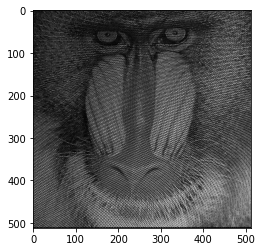

In [10]:
#out = cv.warpPerspective(img, M, (512,512))
out = warp_perspective(img, M, (512,512))
plt.imshow(out, cmap='gray')